In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats
import scipy.stats as stats

In [3]:
df = pd.read_csv("Two+Machines.csv")
df.head()

,Volume,Machine
0,154.27,Machine 1
1,150.03,Machine 1
2,151.14,Machine 1
3,145.47,Machine 1
4,149.71,Machine 1


### Two sample z-test

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Volume   200 non-null    float64
 1   Machine  200 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [5]:
df.describe()

,Volume
count,200.000000
mean,151.538350
std,2.180823
min,145.440000
25%,150.015000
50%,151.515000
75%,153.110000
max,156.230000


In [6]:
df.groupby("Machine")['Volume'].mean()

Machine
Machine 1    151.2039
Machine 2    151.8728
Name: Volume, dtype: float64

<AxesSubplot:xlabel='Machine', ylabel='Volume'>

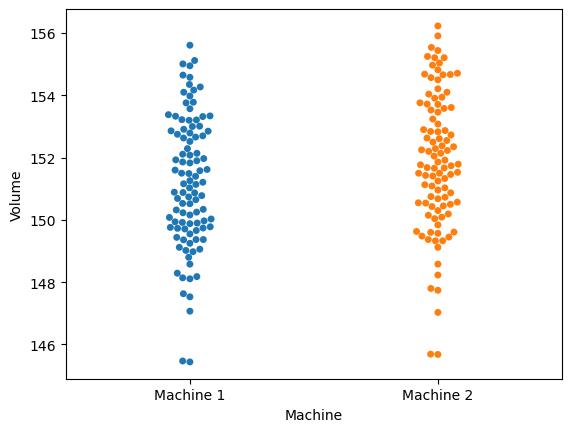

In [7]:
sns.swarmplot(x = "Machine",
              y = 'Volume',
              data = df)

<AxesSubplot:xlabel='Machine', ylabel='Volume'>

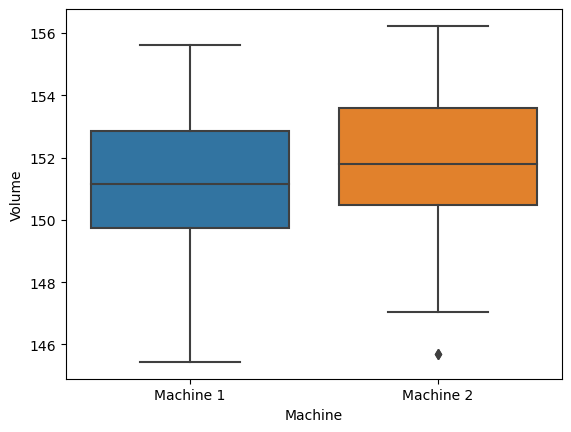

In [8]:
sns.boxplot(x = "Machine",
              y = 'Volume',
              data = df)

In [15]:
m1 = df.loc[df.Machine == 'Machine 1', 'Volume']
m2 = df.loc[df.Machine == 'Machine 2', 'Volume']

statistic = weightstats.ztest(m1, m2)
print(f"z-statistic: {statistic[0]}, p-value: {statistic[1]}")

# Reject the null hypothesis that means are same

z-statistic: -2.189406040190184, p-value: 0.028567341032618248


In [17]:
stats.ttest_ind(m1, m2, equal_var=True) # we can do t-test as well

Ttest_indResult(statistic=-2.189406040190184, pvalue=0.029736299645472124)

### Two-sample z-test using tips dataset

In [21]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [22]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [24]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


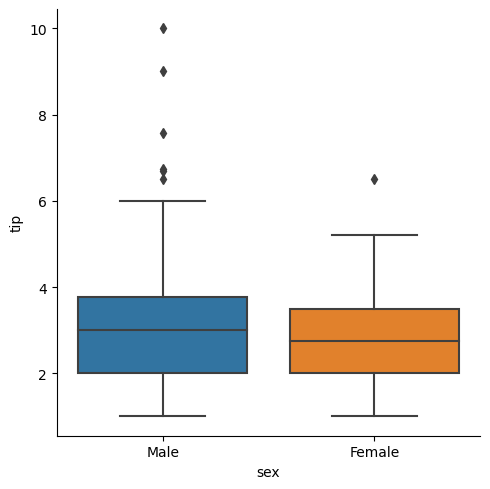

In [25]:
sns.catplot(x = 'sex',
            y = 'tip',
            kind = 'box',
            data = tips)

In [26]:
# H0: Male mean tip = Female mean tip
# OR Male mean tip - Female mean tip = 0

# Ha: Male mean tip != Female mean tip

tm = tips.loc[tips.sex == "Male", 'tip']
tf = tips.loc[tips.sex == "Female", 'tip']

statistic = weightstats.ztest(tm, tf)
print(f"z-statistic: {statistic[0]}, p-value: {statistic[1]}")

# Failed to reject null hypothesis (p-value>0.05)


z-statistic: 1.3878597054212687, p-value: 0.1651797698624794
